In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#1. Import and store the data in a data frame.
airline_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project3_SL1/AirLine.csv") 

In [58]:
airline_df.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [59]:
airline_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Average_Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average_weekly_passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market_share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average_fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market_share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [65]:
# 2. Remove the outliers from the data

# For removing the outliers, i wanted to use the Z value method, however this data set contains some categorical values so i am converting them 
# into numerical representation using label encoder. so that Z value can be calculated

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(airline_df.City1)

LabelEncoder()

In [0]:
airline_df.City1=le.transform(airline_df.City1)

In [67]:
airline_df.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,16,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,16,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,2,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,2,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,2,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [0]:
le.fit(airline_df.City2)
airline_df.City2=le.transform(airline_df.City2)

le.fit(airline_df.market_leading_airline)
airline_df.market_leading_airline=le.transform(airline_df.market_leading_airline)

le.fit(airline_df.Low_price_airline)
airline_df.Low_price_airline=le.transform(airline_df.Low_price_airline)


In [69]:
airline_df.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [0]:
# Now since all the data is in numerical format, then we can get the Z Score
z = np.abs(stats.zscore(airline_df))

In [0]:
# Removing the values where value of z >= 3
airline_df2 = airline_df[(z < 3).all(axis=1)]

In [72]:
# After removing the outliers, the data rows have been reduced
airline_df2.shape

(966, 11)

In [0]:
# 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable

AvgFare_Output= airline_df2.iloc[:,2].values

In [75]:
# This is the dependent variable and rest of the columns are Independent Variable
AvgFare_Output

array([114.47, 122.47, 214.42,  69.4 , 158.13, 135.17, 152.85, 190.73,
       129.35, 134.17, 212.49, 173.56, 170.67, 120.24, 168.69, 154.4 ,
       114.24, 132.29, 181.99, 233.05, 162.21, 161.74,  71.57, 163.63,
       134.42, 165.69,  77.82, 227.93,  74.82, 120.5 , 205.24, 132.52,
       156.55, 117.85, 233.63, 146.06, 234.2 , 184.9 , 195.72, 147.5 ,
       112.28, 194.55, 133.8 , 118.93, 132.  , 131.4 ,  96.78,  94.95,
       211.09, 136.03, 208.6 ,  94.79, 110.6 , 221.95, 259.76, 243.22,
       103.47, 129.21, 103.19, 138.67, 209.89, 116.41,  98.62, 130.89,
       227.23, 198.07, 199.73, 210.45, 137.9 ,  92.18, 130.36, 236.93,
       102.75, 252.66, 203.29,  98.23, 195.29, 115.95, 236.1 , 192.67,
       231.06, 206.36, 250.88, 285.76, 292.  ,  82.76, 265.27,  95.19,
       128.75, 156.32, 137.63, 110.61, 128.2 , 127.37, 123.98, 122.38,
       186.26, 176.77,  90.7 , 150.14, 117.9 ,  87.71, 138.96, 178.55,
        92.35, 258.83, 132.7 , 134.21, 271.07, 163.37, 133.04, 177.41,
      

In [76]:
# 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable
airline_df2.corr()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share.1,price
City1,1.000000,0.295987,-0.095083,0.031700,0.069733,0.058426,-0.077810,-0.111549,0.035810,0.098501,-0.042035
City2,0.295987,1.000000,-0.043443,0.145114,-0.034530,-0.002112,-0.067977,-0.049677,0.021812,0.057720,0.017959
Average_Fare,-0.095083,-0.043443,1.000000,0.552015,-0.222121,-0.335088,-0.228129,0.981103,-0.171226,-0.476023,0.859362
Distance,0.031700,0.145114,0.552015,1.000000,-0.164635,-0.165824,-0.533325,0.526077,-0.194347,-0.365148,0.557689
Average_weekly_passengers,0.069733,-0.034530,-0.222121,-0.164635,1.000000,0.043565,0.032822,-0.190827,0.062482,0.078109,-0.254185
market_leading_airline,0.058426,-0.002112,-0.335088,-0.165824,0.043565,1.000000,0.115983,-0.314923,0.281880,0.180273,-0.305649
market_share,-0.077810,-0.067977,-0.228129,-0.533325,0.032822,0.115983,1.000000,-0.214354,0.148797,0.298800,-0.314585
Average_fare,-0.111549,-0.049677,0.981103,0.526077,-0.190827,-0.314923,-0.214354,1.000000,-0.163372,-0.499622,0.817292
Low_price_airline,0.035810,0.021812,-0.171226,-0.194347,0.062482,0.281880,0.148797,-0.163372,1.000000,0.214277,-0.218083
market_share.1,0.098501,0.057720,-0.476023,-0.365148,0.078109,0.180273,0.298800,-0.499622,0.214277,1.000000,-0.249619


In [97]:
# Only two columns have correlation less than .1 however those are categorical data. We can still go ahead and remove these columns.

# Even after not removing these columns the model acuuracy is not getting impacted but it is going to improve the model performance with less amount of data
# loaded in the memory

airline_df2.drop('City1', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
airline_df2.drop('City2', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


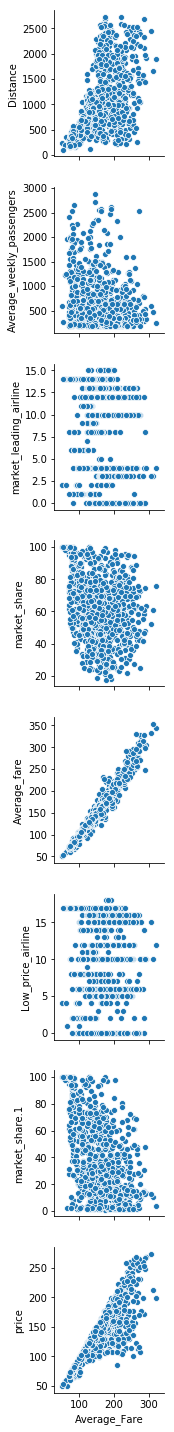

In [100]:
# 5. Create scatter Plot of Independent Variable vs Dependent Variable
# 'City1', 'City2',
sns.pairplot(airline_df2, y_vars=['Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare', 'Low_price_airline', 'market_share.1', 'price'], x_vars="Average_Fare")

# Below is the scatter plot for independent and dependent variables

In [0]:
# 6. Divide the data set into training and test data set and build a Multiple Linear Regression model.
# Copy all the predictor variables into X dataframe. Since 'Average Fare' is our dependent variable drop it
X = airline_df2.drop('Average_Fare', axis=1)

# Copy the 'Average_Fare' column alone into the y dataframe. This is the dependent variable
y = airline_df2[['Average_Fare']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [103]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# 7. Print the coefficients & intercepts of the linear regression model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0024335817835931814
The coefficient for Average_weekly_passengers is -0.001777093356121806
The coefficient for market_leading_airline is -0.19432416595489507
The coefficient for market_share is 0.061216043944074594
The coefficient for Average_fare is 0.7307579971159076
The coefficient for Low_price_airline is 0.11936578994163577
The coefficient for market_share.1 is -0.03980503596217171
The coefficient for price is 0.21370908808624875


In [105]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.910480975002599


In [106]:
# 8. Print the accuracy of the overall model
regression_model.score(X_test, y_test)

0.972481514816236

In [0]:
# This means that there is 97% accuracy

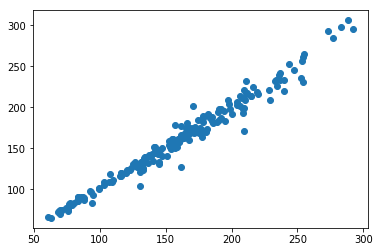

In [108]:
import matplotlib.pyplot as plt 
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)